In [1]:
#Importing Libraries that I need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Step1 : Load the data and inspect
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
#Step2 : Checking missing values and data cleaning

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df['TotalCharges'].value_counts()               #there are 11 blank values

TotalCharges
          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [8]:
#handeling blank values

df.index[df['TotalCharges'] == ' '].tolist()

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [9]:
df.iloc[[488, 753, 936, 1082, 1340, 3331, 3826, 4380]]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No


In [10]:
# Replacing the ' ' with 0 as tenure is 0 in TotalCharges and changing data-type to float
df["TotalCharges"] = df["TotalCharges"].replace(' ', 0)
df["TotalCharges"] = df["TotalCharges"].astype("float")

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
#The SeniorCitizen Column does not have any significance with the describe(). Therefore, converting it into yes or no.
def change(value):
    if value == 1:
        return "yes"
    else:
        return "no"
    
df["SeniorCitizen"] = df["SeniorCitizen"].apply(change)

In [12]:
#Step3 : Get statistical summary of the data.
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [13]:
#Exploratory Data Analysis (EDA) based on
#1.DEMOGRAPHIC INFO OF CUSTOMERS
#2.SERVICE'S
#3.CUSTOMER ACCOUNT INFORMATION.

In [14]:
#1.EDA BASED ON DEMOGRAPHIC INFO OF CUSTOMERS

[Text(0, 0, '1869')]

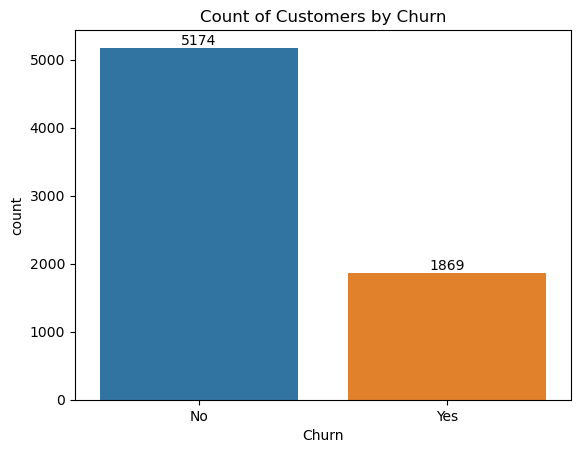

In [15]:
# Count of customers by churn
churn_count = sns.countplot(x = "Churn" ,data=df,hue='Churn')
churn_count.set_title('Count of Customers by Churn')
churn_count.bar_label(container=churn_count.containers[0])
churn_count.bar_label(container=churn_count.containers[1])

Text(0.5, 1.0, 'Percentage of Churned Customers')

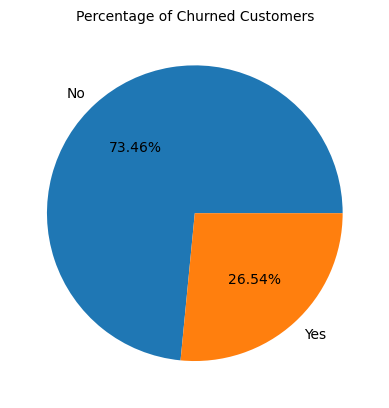

In [16]:
# Percentage of Churned Customers and Not Churned Customers.

churn_percent = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(churn_percent["Churn"],labels = churn_percent.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 10)

Text(0.5, 1.0, 'Distribution of Senior Citizens')

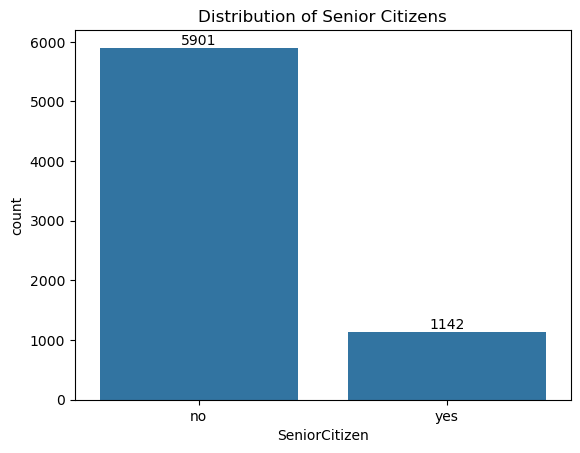

In [17]:
# Distribution of the Senior Citizens 
ax = sns.countplot(x='SeniorCitizen',data=df)
ax.bar_label(container=ax.containers[0])
ax.set_title('Distribution of Senior Citizens')

Text(0.5, 1.0, 'Churn based on Senior Citizens')

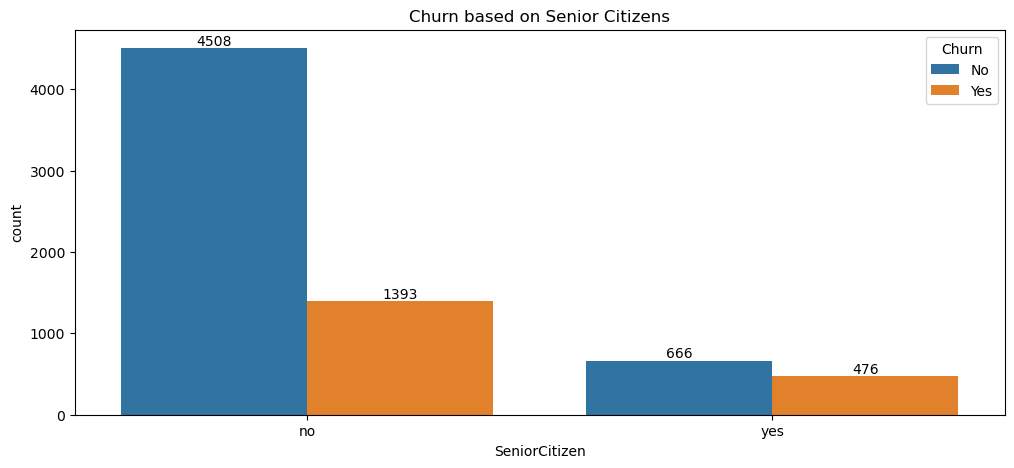

In [18]:
# Churn count based on the Senior Citizens.
plt.figure(figsize=(12, 5))

ax = sns.countplot(x='SeniorCitizen',hue='Churn',data=df)
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
ax.set_title('Churn based on Senior Citizens')

Text(0, 0.5, 'Percentage (%)')

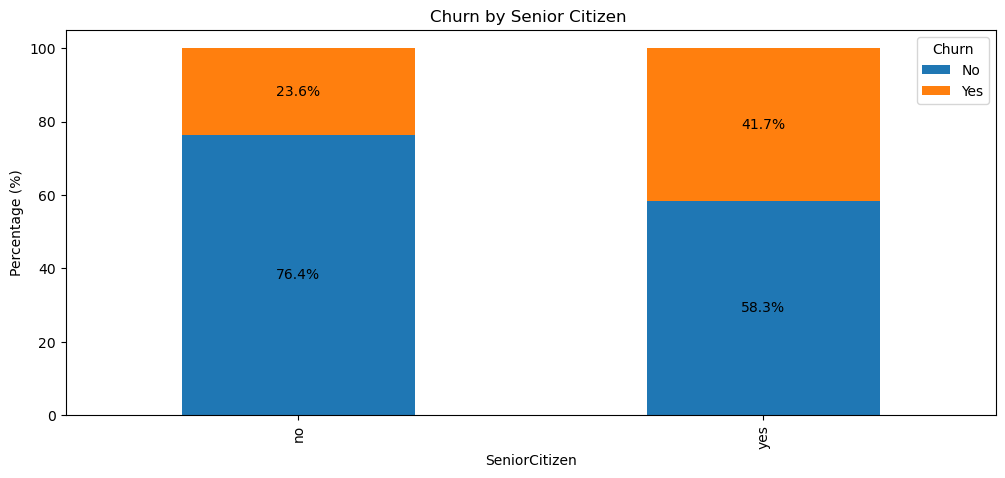

In [19]:
# Stacked Chart of churn based on Senior Citizen.
total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

fig, ax = plt.subplots(figsize=(12, 5))  

total_counts.plot(kind='bar', stacked=True, ax=ax)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen ')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')

Text(0.5, 1.0, 'Churn based on Partner')

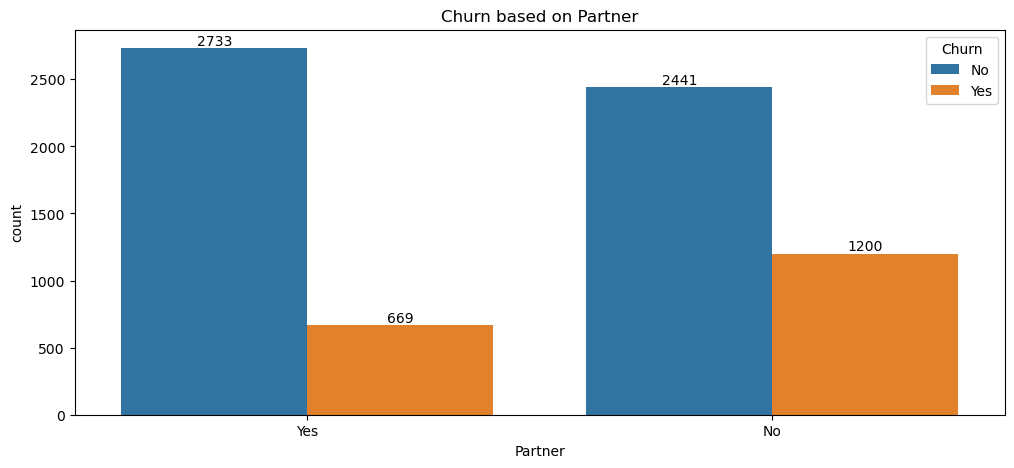

In [20]:
# Churn based on the partner.
plt.figure(figsize=(12, 5))

ax = sns.countplot(x='Partner',hue='Churn',data=df)
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
ax.set_title('Churn based on Partner')

Text(0.5, 1.0, 'Churn based on Dependents')

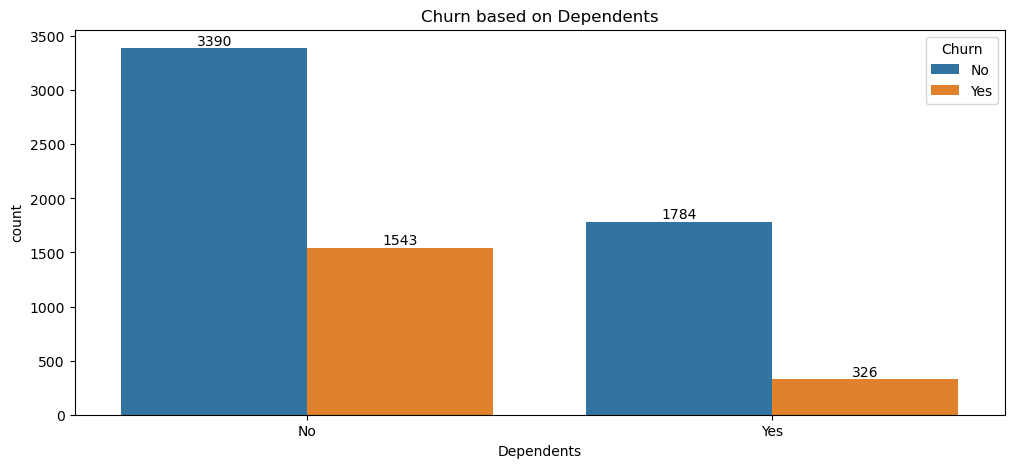

In [21]:
# Churn based on the dependents.
plt.figure(figsize=(12, 5))

ax = sns.countplot(x='Dependents',hue='Churn',data=df)
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
ax.set_title('Churn based on Dependents')

In [ ]:
# ANALYSIS 1: From the customers most of the senior citizens have churned. 
# The customers who does not have a partner or any dependent tends to churn at a higher rate.

In [22]:
#1.EDA BASED ON SERVICE'S

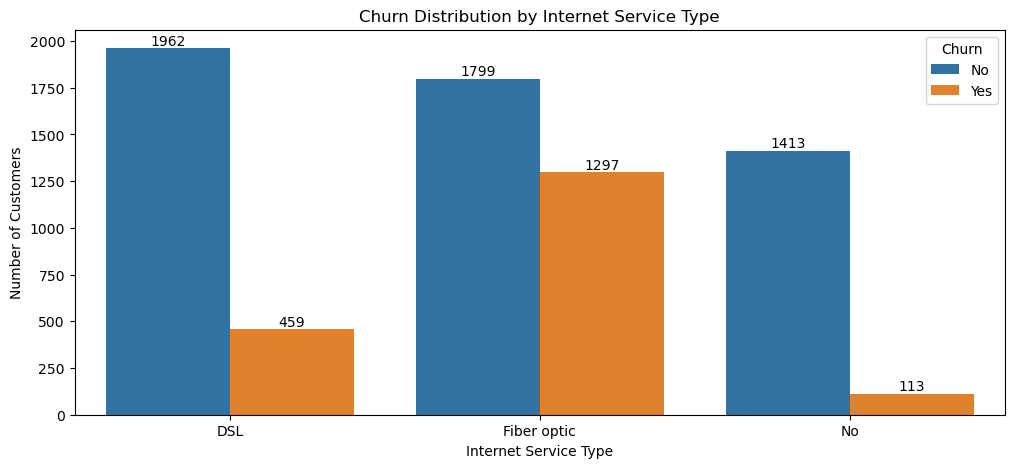

In [23]:
# Churn Distribution based on Internet Service Type
plt.figure(figsize=(12, 5))

ax=sns.countplot(data=df, x='InternetService', hue='Churn')
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])

plt.title('Churn Distribution by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')

In [ ]:
# ANALYSIS 2: We can see from above plot that the Fiber optic internet service type is making our customers to churn more.

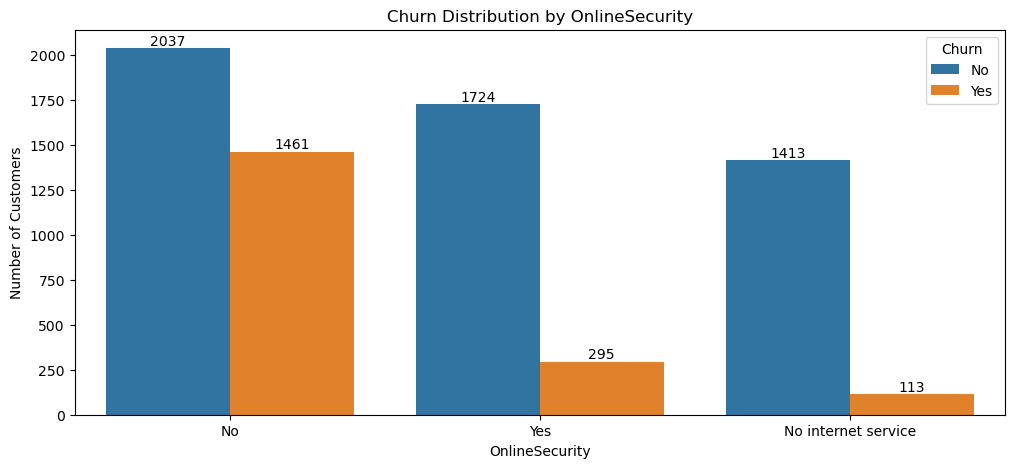

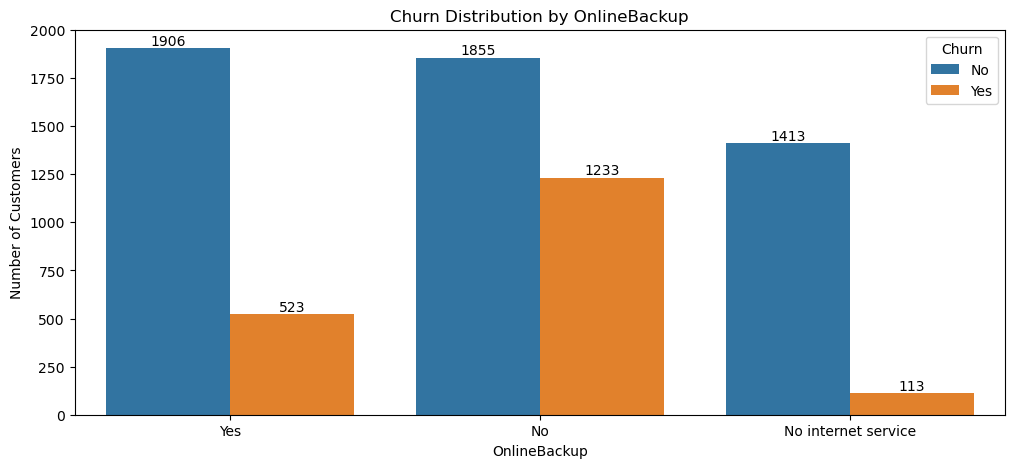

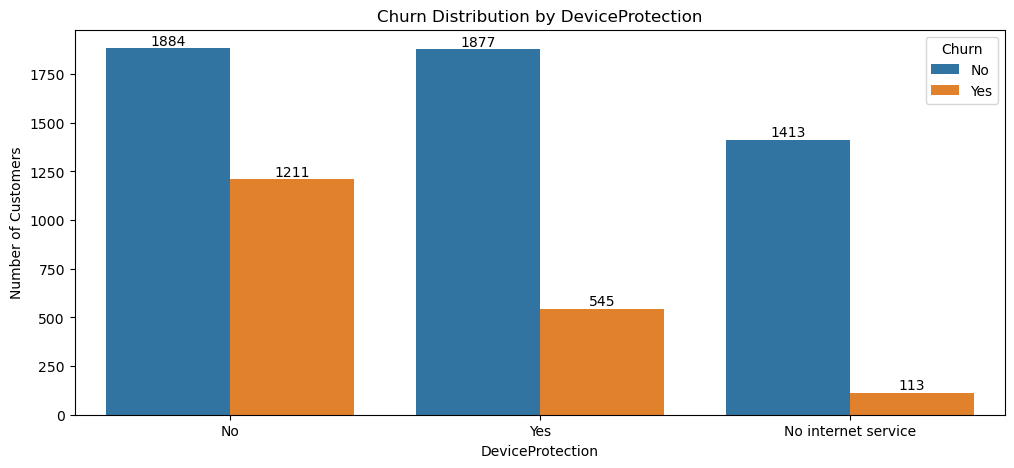

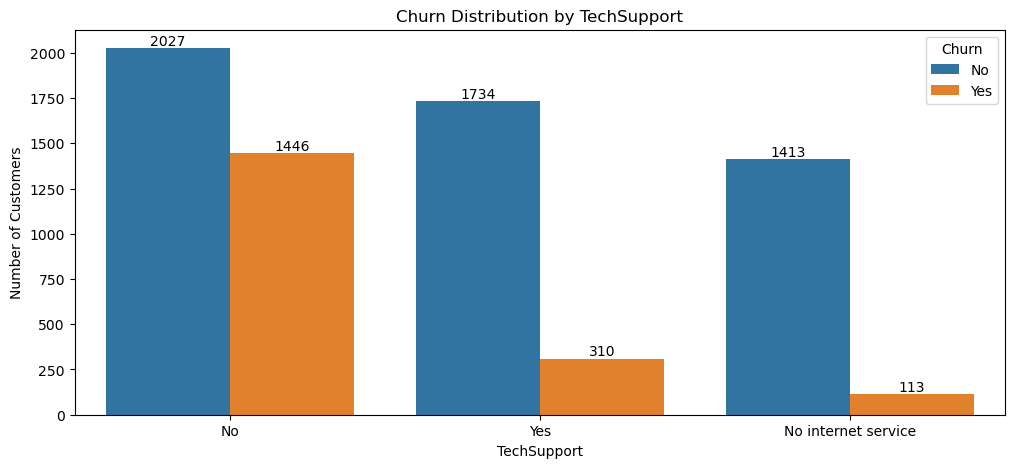

In [24]:
service_name = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

for service in service_name:
    
    plt.figure(figsize=(12, 5))
    ax=sns.countplot(data=df, x=service, hue='Churn')
    ax.bar_label(container=ax.containers[0])
    ax.bar_label(container=ax.containers[1])
    
    plt.title(f'Churn Distribution by {service}')
    plt.xlabel(service)
    plt.ylabel('Number of Customers')
    plt.legend(title='Churn')

In [ ]:
# ANALYSIS 3: From above chart's we can see that customers having no addtional services will tend to Churn.

In [25]:
#3. EDA BASED ON CUSTOMER ACCOUNT INFORMATION.

Text(0.5, 1.0, 'Contract VS Churn')

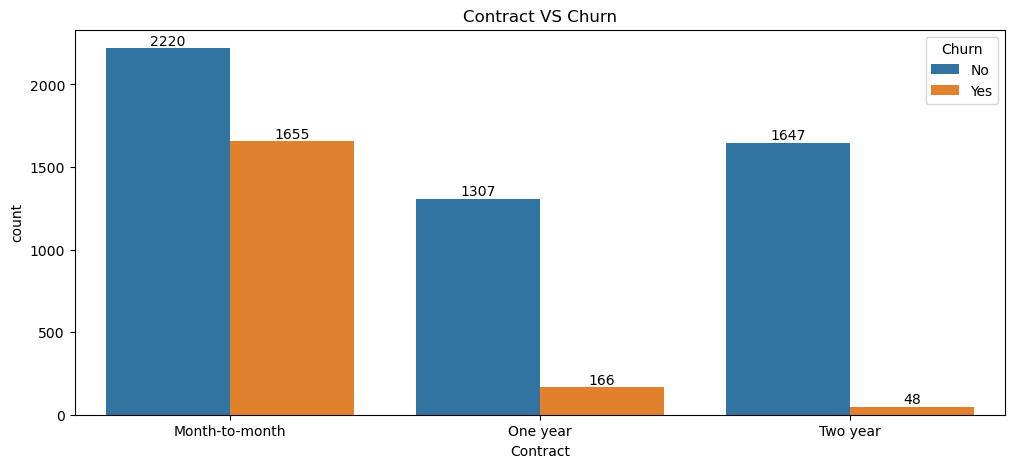

In [26]:
# Contract VS Churn
plt.figure(figsize=(12, 5))
ax = sns.countplot(x='Contract',data=df,hue="Churn")
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])
ax.set_title('Contract VS Churn')

In [ ]:
# ANALYSIS 4: Customers who have month to month contract are likely to churn than from those who have 1 or 2 years or contract.

[Text(0, 0, '1071'), Text(0, 0, '308'), Text(0, 0, '258'), Text(0, 0, '232')]

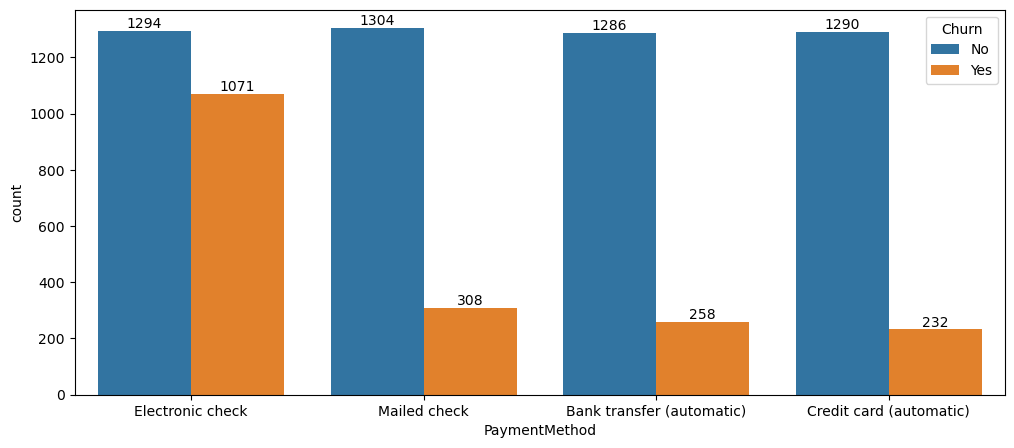

In [27]:
# Churn Vs Payment Method
plt.figure(figsize=(12, 5))
ax = sns.countplot(x='PaymentMethod',data=df,hue="Churn")
ax.bar_label(container=ax.containers[0])
ax.bar_label(container=ax.containers[1])

In [ ]:
# ANALYSIS 5: The Electronic check payment method customers are churning more than any other payment method.

Text(0, 0.5, 'Frequency')

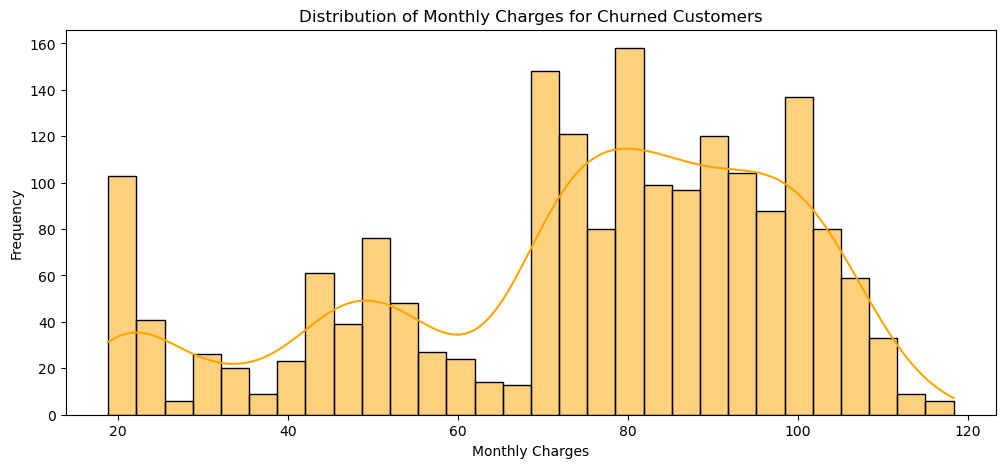

In [28]:
# Monthly charges distribution
churned_customers = df[df['Churn'] == 'Yes']
plt.figure(figsize=(12, 5))
sns.histplot(churned_customers['MonthlyCharges'], bins=30, kde=True,color='orange')
plt.title('Distribution of Monthly Charges for Churned Customers')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

In [ ]:
# ANALYSIS 6: Due to higher monthly charges there is an increase in the churn of customers.

Text(0, 0.5, 'Number of Customers')

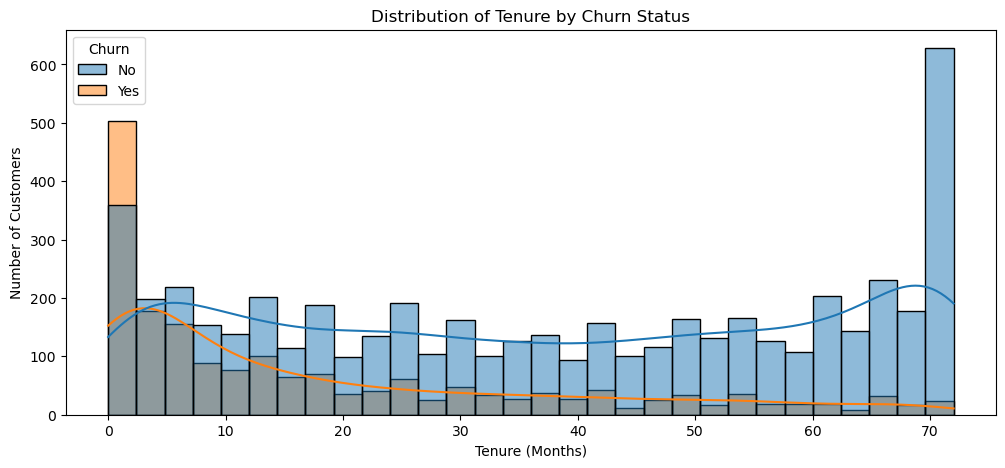

In [29]:
# Histogram based on Churn VS tenure.
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, bins=30)
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')

In [ ]:
# ANALYSIS 7: From above chart we can see Month-to-month contract has high impact on a customers-churning